<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

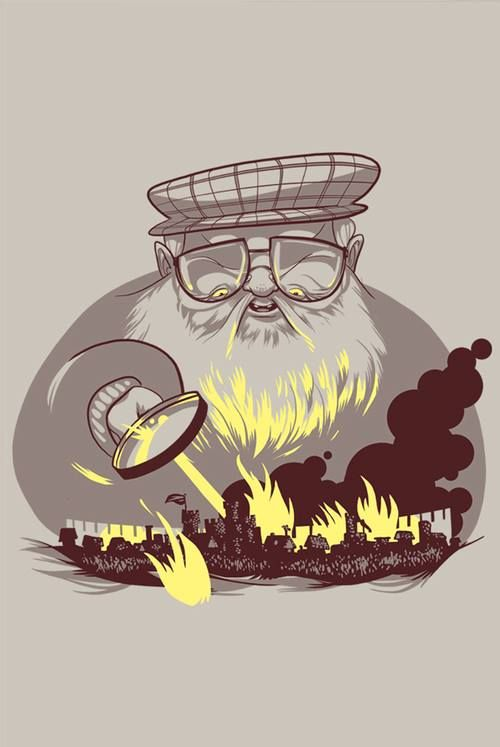

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 58.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 55.5MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
data = pd.read_csv('/content/drive/MyDrive/game_of_thrones_test.csv',index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

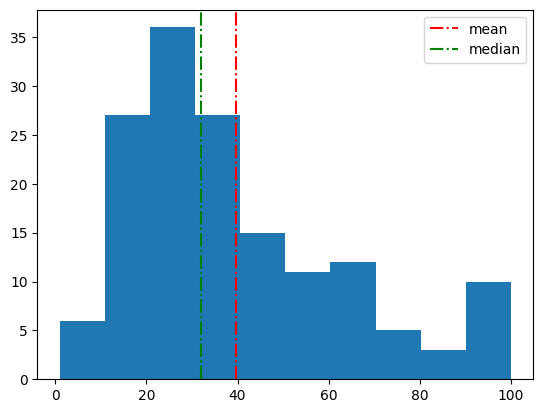

In [77]:
data_without_na = data.drop(columns=['mother','father','heir','spouse','isAliveFather','isAliveMother','isAliveHeir','isAliveSpouse'])
valid_age_data = data_without_na.loc[data_without_na['age']>0]
mean_age = valid_age_data['age'].dropna().mean()
median_age = valid_age_data['age'].dropna().median()
mode_age = valid_age_data['age'].dropna().mode()

plt.hist(valid_age_data['age'])
plt.axvline(color='red',x=mean_age,label='mean',linestyle='-.')
plt.axvline(color='green',x=median_age,label='median',linestyle='-.')
plt.legend()
plt.show()

data_without_na.loc[(data_without_na['age']<0)|data_without_na['age'].isna(),'age']=median_age


282.0


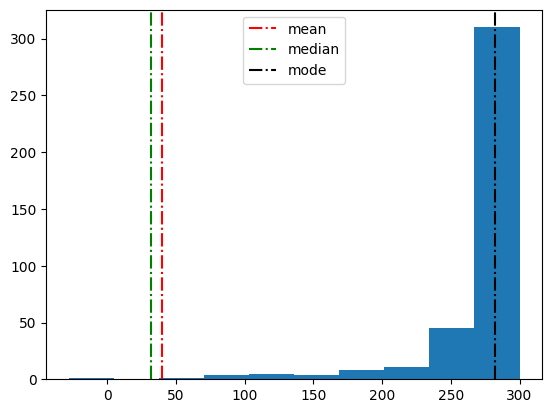

In [80]:
valid_birth_data = data_without_na.loc[data_without_na['dateOfBirth']<50000]
mean_birth = valid_birth_data['dateOfBirth'].dropna().mean()
median_birth = valid_birth_data['dateOfBirth'].dropna().median()
mode_birth = valid_birth_data['dateOfBirth'].dropna().mode()

print(mode_birth[0])
plt.hist(valid_birth_data['dateOfBirth'])
plt.axvline(color='red',x=mean_age,label='mean',linestyle='-.')
plt.axvline(color='green',x=median_age,label='median',linestyle='-.')
plt.axvline(color='black',x=mode_birth[0],label='mode',linestyle='-.')
plt.legend()
plt.show()

data_without_na.loc[(data_without_na['dateOfBirth']>50000)|data_without_na['dateOfBirth'].isna(),'dateOfBirth']=mode_birth[0]


In [82]:
data_without_na['title'].median()

TypeError: Cannot convert [nan nan nan 'Ser' nan nan nan nan nan nan 'Riverrun' 'Septa' 'Maester'
 'Maester' 'Sandship' nan 'Princess' 'Keeper of the Gates of the Moon'
 'Lord of Oakenshield' nan 'PrincessQueen' 'Ser' nan 'Highgarden' 'Ser'
 'Grand Maester' nan 'Ser' 'Ser' "Storm's End" 'Ser' 'First Builder' 'Ser'
 'Ser' nan 'Arbor' 'Nightsong' nan nan nan 'Ser' 'Castellan of Harrenhal'
 'Warlock' 'Maester' 'Grand Maester' nan 'Bloodrider' 'Ser' 'Red Jester'
 'Lord of the Hornwood' 'Horn Hill' 'Ser' 'Darry' 'Acorn Hall' nan
 'Lordsport' 'Magnar of Thenn' nan nan nan nan nan 'Ser' nan nan
 'Golden Storm' nan 'Iron Islands' nan nan 'Ser' 'Brightwater' nan
 'Highgarden' nan 'Lord of Southshield' 'Ser' 'Ser' 'Ser' 'Sunspear'
 'Old Oak' 'Ser' 'Ser' nan 'Ser' 'Black Wind' nan 'King-Beyond-the-Wall'
 'Blacktyde' nan 'Maester' nan 'Ser' nan 'Ser' 'Barrowton' nan nan nan
 'First Ranger' nan 'Lord of Blackhaven' nan nan 'The NorreyLord Norrey'
 'Lord Steward' 'Ser' 'King of Winter' 'Ser' 'Ser' 'Maester' 'Vaith'
 'Septon' nan 'Ser' 'Maester' 'Lord of the Tides' 'Ser' 'Ser'
 'Commander of the City Watch' 'Andals' nan 'Ser' nan nan nan 'Ser' nan
 nan nan nan 'Winterfell' nan 'Ser' 'Princess' 'Ser' nan 'Harrenhal' nan
 'Knight' nan nan 'Green Grace' nan 'Ser' nan 'Lady' 'Ser' nan nan 'Ser'
 'Ser' 'Lord of Hammerhorn' nan nan nan '[1]' nan 'Ser' 'Lonely Light'
 'Ser' 'LordWisdom' 'Bloodrider' nan nan nan 'Captain-General' 'Knight'
 nan nan 'High Septon' nan 'Greywater Watch' nan 'Ser' 'Ser'
 'Lord Paramount of the Trident' 'Oakenshield' 'Ser' 'Magister' nan 'Ser'
 nan 'Ser' 'Ser' 'Seagard' nan 'Eyrie' 'Knight' 'Stone Hedge' 'Ser'
 'Maester' "Lord Commander of the Night's Watch" nan 'Ser'
 'Lady of the Leaves' nan 'Hightower' 'Lord of Harrenhal' 'Maester' 'Ser'
 'Twins' 'Ser' 'Lady of the Vale' 'Lady of Bear Island' nan nan 'Ser'
 'Ser' 'Ser' nan nan 'Ser' 'Goldengrove' 'Septon' 'Godswife' nan 'Lord'
 nan nan nan nan 'Ser' nan 'Dreadfort' 'Princess' nan
 'Lord Paramount of the Stormlands' 'green lands' 'Ser' 'Harlaw' 'Maester'
 nan 'Ser' 'Ser' 'Princess' 'Lord of Harrenhal' nan 'Eyrie' 'Bloodrider'
 'PrincessQueenDowager Queen' 'Casterly Rock' nan 'Lord of White Harbor'
 nan nan nan nan 'Ser' nan nan nan 'Ser' nan "Storm's End" nan 'Karhold'
 nan nan 'Seneschal' 'Ser' 'Raventree Hall' nan 'Ser' 'Ser' nan nan
 "Lord of Griffin's Roost" nan 'Winterfell' 'QueenDowager Queen'
 'Master of coin' 'Lord of the Seven Kingdoms' 'Master of Whisperers' nan
 'Prince of the Narrow Sea' 'Lord Captain of the Iron Fleet' nan nan nan
 nan 'Ruddy Hall' nan 'Hand of the King' nan 'Prince' 'Ser' 'Barrowton'
 nan nan nan 'Ser' 'First Ranger' 'Ser' 'LadyQueen' nan nan nan nan nan
 'SerCastellan of Casterly Rock' nan nan nan 'Ser' nan 'Ser' nan 'Maester'
 'Longtable' 'Bear Island' nan 'Ser' 'Castellan' nan 'Ser'
 'Master of whisperers' nan nan 'Prince of WinterfellHeir to Winterfell'
 nan 'Ser' nan 'Princess' 'Ser' nan 'Ser' nan nan nan nan nan nan
 'Princess' nan 'Haystack Hall' nan nan nan nan 'Prince' 'Princess' nan
 nan 'Lady' nan 'Old Wyk' 'Ser' nan nan nan 'the Crossing'
 'Hand of the King' nan 'Ser' nan 'Andals' nan 'Ser' 'Ser' nan
 'Prince of Dragonstone' 'Khal' nan nan 'the Dreadfort' 'Ser' nan 'Ser'
 nan 'Ser' 'Sunspear' nan 'Runestone' nan nan 'Khal' 'Coldmoat' nan 'Ser'
 nan "Slave of R'hllor" nan nan nan nan nan nan 'Casterly Rock'] to numeric

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# ...

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=[...], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
# ...

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = # ...
y = # ...

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = # ...

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)